# Modelo de Random Forest para Pedigrí Forense.

Modelo de random forest para resolver el problema de clasificación de registros en pedigrí forenses usando 2 clases como clasificador (parentesco, no parentesco) 

---

## Configuración 

En esta sección se realiza lo siguiente:
- Importado de las librerías necesarias para trabajar en todo el *notebook*.
- Exploración de los datos.
- Separación de los datos en entrenamiento y pruebas.
- Selección de las variables X y Y para el entrenamiento del modelo.

In [45]:
# Imports
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import joblib as jbl
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [46]:
# Reading the CSV files with pandas library

base_path = "../data/processed/definitive-two-classes/"

df_train = pd.read_csv(base_path + "train.csv")
df_test = pd.read_csv(base_path + "test.csv")
df_real = pd.read_csv(base_path + "real.csv")

In [47]:
# Exploring the data

df_train.head()

,Shared_Markers,k0,k1,k2,Share_allele,Value,True_positive,Marcadores,Software,Datos,Kinship,File,Hoja,Sheet,Value_range,FAM_Sample_info_id,FAM_Sample_info_rel,VIC_Sample_info_id,VIC_Sample_info_rel,ValueLog10
0,15,0,11,4,19,100.000,0,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-1,1:749,100-999,83202,S,66302,F,2.000000
1,15,0,5,10,25,694.085,0,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,100-999,30702,F,98602,S,2.841413
2,15,0,4,11,26,12041.600,1,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-375,375:375,10000-99999,133801,S,133801,F,4.080684
3,15,0,9,6,21,11098.100,1,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-175,175:575,10000-99999,28901,S,28901,F,4.045249
4,15,0,9,6,21,800.000,0,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-175,175:575,100-999,132702,S,142701,F,2.903090


In [48]:
# Feature columns for the random forest model

feature_columns = ["k1", "k2", "ValueLog10"]
label_columns = ["True_positive"]

In [49]:
# Splitting data into training and testing sets

# Train
x_train = df_train[feature_columns]
y_train = df_train[label_columns]

# Test
x_test = df_test[feature_columns]
y_test = df_test[label_columns]

# Real data
x_real = df_real[feature_columns]
y_real = df_real[label_columns]

---

## Entrenamiento y métricas

En esta sección sé instancia un modelo por defecto de random forest, realizando un entrenamiento con los datos de este mismo conjunto, documentando métricas (matriz de confusión, precisión, recall, exactitud, entre otras) en su capacidad de aprendizaje, la capacidad de predicción en conjunto de pruebas y reales.

In [50]:
# Default Random Forest model 

rf_model = RandomForestClassifier(n_jobs=-1)

In [51]:
# Train a Random Forest model with feature columns

rf_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


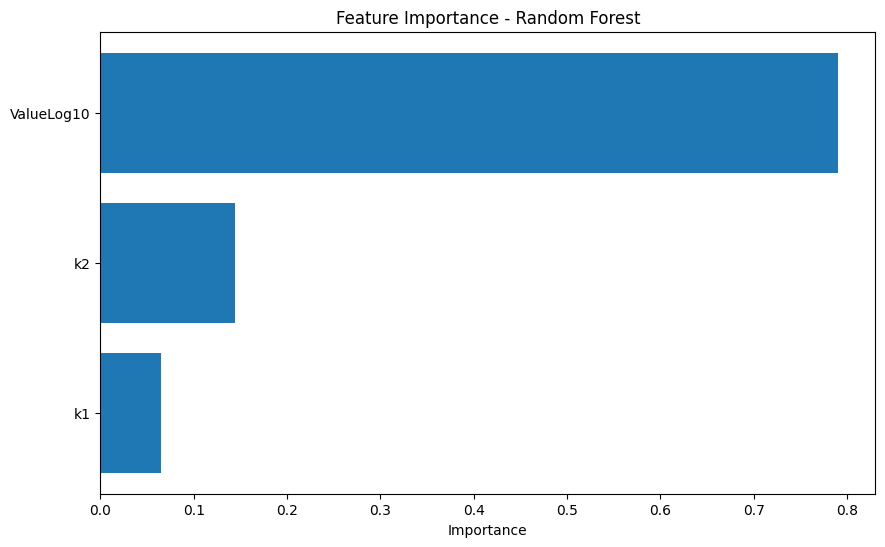

In [52]:
importances = rf_model.feature_importances_
# Crear DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizar
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()

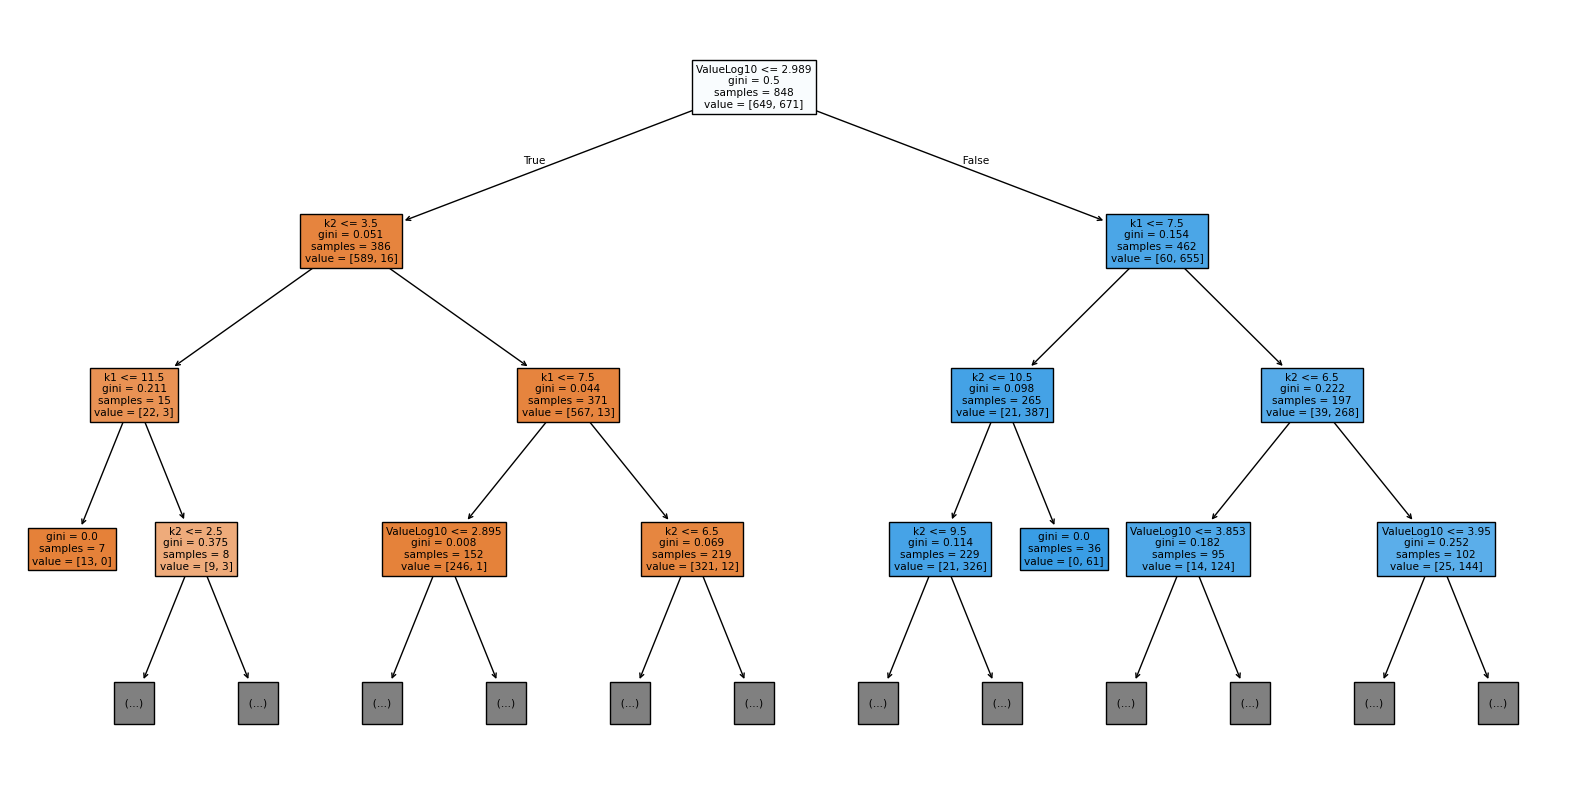

In [53]:
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=feature_columns, filled=True, max_depth=3)
plt.show()

### Capacidad de aprendizaje con el set de entrenamiento

In [54]:
y_train_pred = rf_model.predict(x_train)

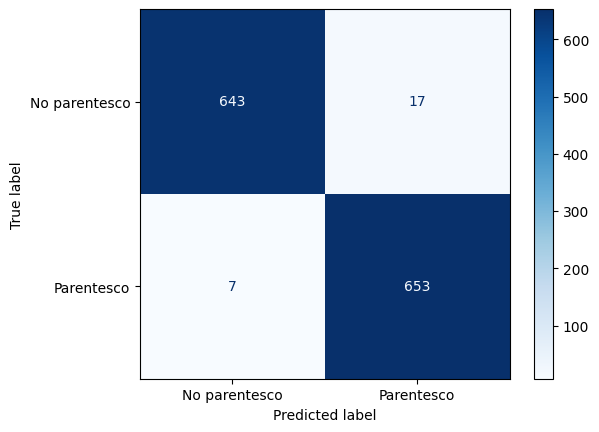

In [55]:
# Print the confusion matrix

conf_matrix_lr = confusion_matrix(y_train, y_train_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=["No parentesco", "Parentesco"])
cm_display.plot(cmap=plt.cm.Blues)

In [56]:
# Print the metrics for the random forest model in train set

print("===== Metrics for random forest Model =====")
print(classification_report(y_train, y_train_pred, target_names=["No parentesco", "Parentesco"]))

===== Metrics for random forest Model =====
               precision    recall  f1-score   support

No parentesco       0.99      0.97      0.98       660
   Parentesco       0.97      0.99      0.98       660

     accuracy                           0.98      1320
    macro avg       0.98      0.98      0.98      1320
 weighted avg       0.98      0.98      0.98      1320



### Predicciones con el conjunto de pruebas

In [57]:
# Predicting on the test set

y_test_pred = rf_model.predict(x_test)

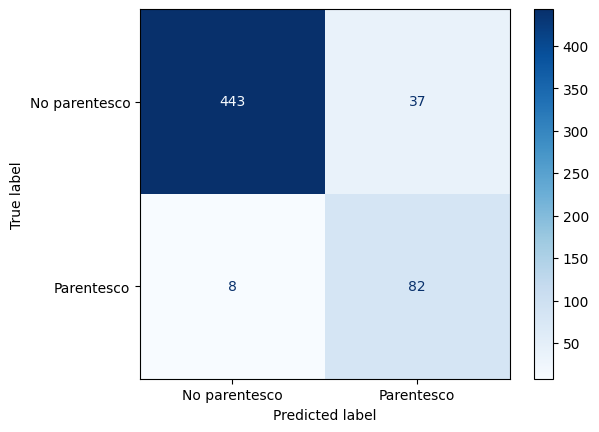

In [58]:
# Print the confusion matrix

conf_matrix_lr = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=["No parentesco", "Parentesco"])
cm_display.plot(cmap=plt.cm.Blues)

In [59]:
# Print the metrics for the random forest model in train set

print("===== Metrics for random forest Model =====")
print(classification_report(y_test, y_test_pred, target_names=["No parentesco", "Parentesco"]))

===== Metrics for random forest Model =====
               precision    recall  f1-score   support

No parentesco       0.98      0.92      0.95       480
   Parentesco       0.69      0.91      0.78        90

     accuracy                           0.92       570
    macro avg       0.84      0.92      0.87       570
 weighted avg       0.94      0.92      0.93       570



### Predicciones con el conjunto de datos reales

In [60]:
# Predicting on the real set

y_real_pred = rf_model.predict(x_real)

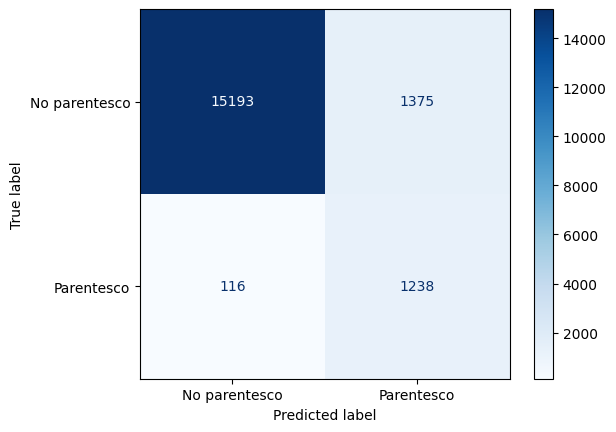

In [61]:
# Print the confusion matrix

conf_matrix_lr = confusion_matrix(y_real, y_real_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=["No parentesco", "Parentesco"])
cm_display.plot(cmap=plt.cm.Blues)

In [62]:
# Print the metrics for the random forest model in train set

print("===== Metrics for random forest Model =====")
print(classification_report(y_real, y_real_pred, target_names=["No parentesco", "Parentesco"]))

===== Metrics for random forest Model =====
               precision    recall  f1-score   support

No parentesco       0.99      0.92      0.95     16568
   Parentesco       0.47      0.91      0.62      1354

     accuracy                           0.92     17922
    macro avg       0.73      0.92      0.79     17922
 weighted avg       0.95      0.92      0.93     17922



### Exportado del modelo

In [63]:
path_model = "../models/"
jbl.dump(rf_model, path_model + "random_forest-twoclass-base.joblib")

['../models/random_forest-twoclass-base.joblib']

---

## Ajuste de hiperparámetros

En esta sección  se realizó el ajuste de hiperparámetros para un modelo de random forest, buscando cuáles son las mejores métricas para este problema con 2 clases mediante Grid Search.

In [64]:
# Function to measure the time taken for execution

def timer(start_time = None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [65]:
# Hyperparameter tuning with Grid Search

param_grid = [
    {
        'n_estimators': [100, 200, 300],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 15, 20],
        'min_samples_leaf': [1, 2, 4, 5, 10],
        'n_jobs': [-1]
    }
]

In [66]:
# Base Random Forest model 

rf_model = RandomForestClassifier(n_jobs=-1)

In [67]:
# Grid Search for hyperparameter tuning

model_grid = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')

In [68]:
# Training the model with Grid Search

start_time = timer(None)

model_grid.fit(x_train, y_train)

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See h

,estimator,RandomForestC...ier(n_jobs=-1)
,param_grid,"[{'criterion': ['gini', 'entropy', ...], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}]"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [69]:
# Check time taken for training

timer(start_time)


 Time taken: 0 hours 10 minutes and 17.64 seconds.


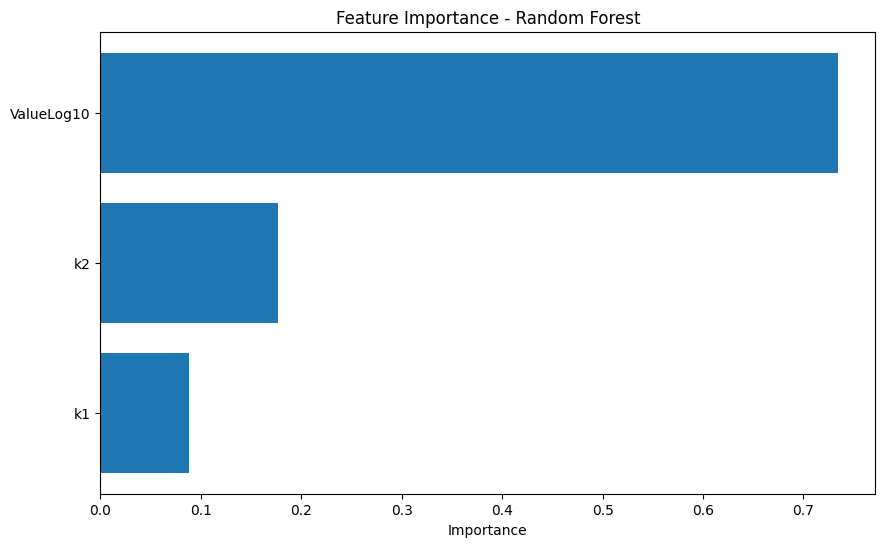

In [70]:
importances = model_grid.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizar
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()

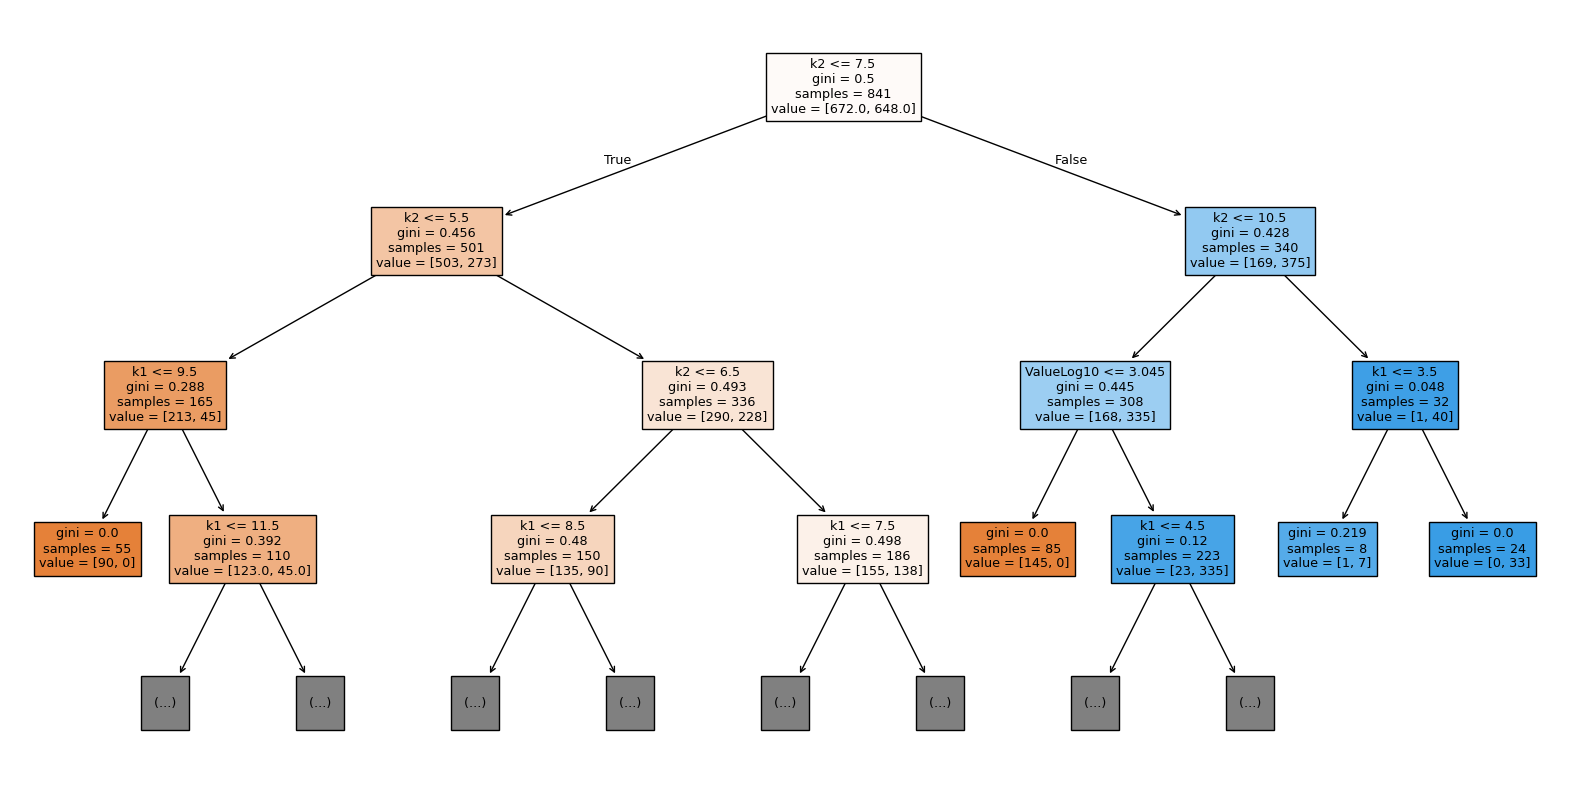

In [71]:
plt.figure(figsize=(20, 10))
plot_tree(model_grid.best_estimator_.estimators_[0], feature_names=feature_columns, filled=True, max_depth=3)
plt.show()

In [72]:
# Save the results of the Grid Search

results = pd.DataFrame(model_grid.cv_results_)
results.to_csv(path_model + "random_forest-twoclass-gridsearch.csv", index=False)

### Capacidad de aprendizaje con el set de entrenamiento

In [73]:
y_train_pred = model_grid.predict(x_train)

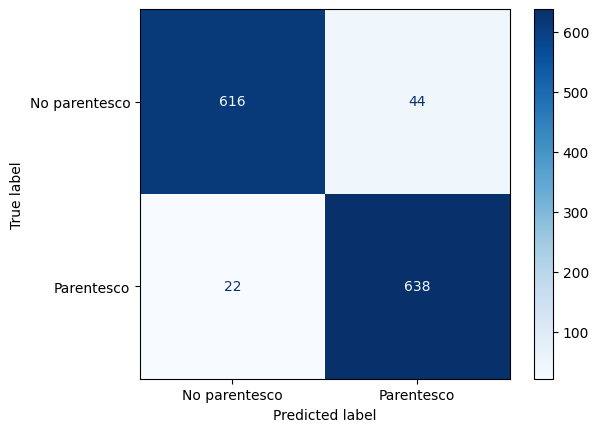

In [74]:
# Print the confusion matrix

conf_matrix_lr = confusion_matrix(y_train, y_train_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=["No parentesco", "Parentesco"])
cm_display.plot(cmap=plt.cm.Blues)

In [75]:
# Print the metrics for the random forest model in train set

print("===== Metrics for random forest Model =====")
print(classification_report(y_train, y_train_pred, target_names=["No parentesco", "Parentesco"]))

===== Metrics for random forest Model =====
               precision    recall  f1-score   support

No parentesco       0.97      0.93      0.95       660
   Parentesco       0.94      0.97      0.95       660

     accuracy                           0.95      1320
    macro avg       0.95      0.95      0.95      1320
 weighted avg       0.95      0.95      0.95      1320



### Predicciones con el conjunto de pruebas

In [76]:
# Predicting on the test set

y_test_pred = model_grid.predict(x_test)

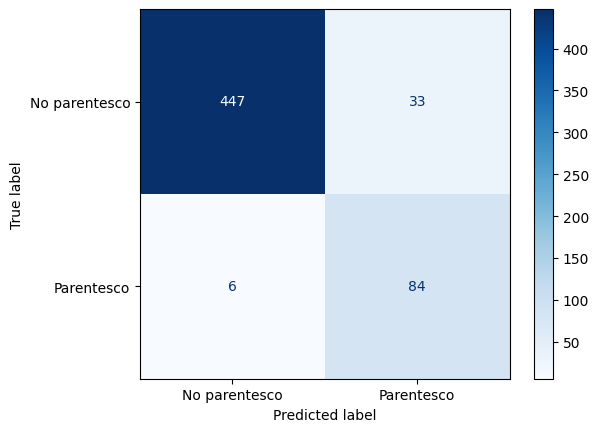

In [77]:
# Print the confusion matrix

conf_matrix_lr = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=["No parentesco", "Parentesco"])
cm_display.plot(cmap=plt.cm.Blues)

In [78]:
# Print the metrics for the random forest model in train set

print("===== Metrics for random forest Model =====")
print(classification_report(y_test, y_test_pred, target_names=["No parentesco", "Parentesco"]))

===== Metrics for random forest Model =====
               precision    recall  f1-score   support

No parentesco       0.99      0.93      0.96       480
   Parentesco       0.72      0.93      0.81        90

     accuracy                           0.93       570
    macro avg       0.85      0.93      0.88       570
 weighted avg       0.94      0.93      0.94       570



### Predicciones con el conjunto de datos reales

In [79]:
# Predicting on the real set

y_real_pred = model_grid.predict(x_real)

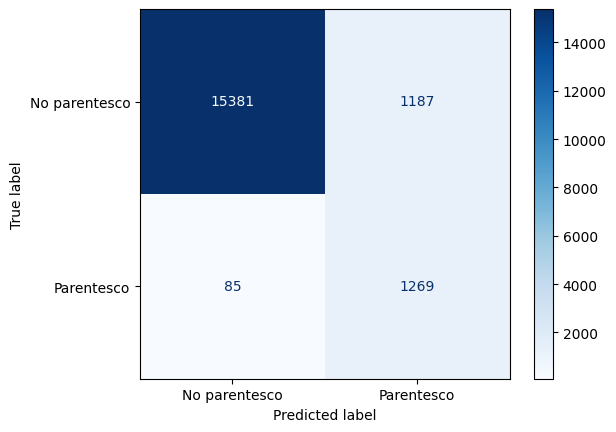

In [80]:
# Print the confusion matrix

conf_matrix_lr = confusion_matrix(y_real, y_real_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=["No parentesco", "Parentesco"])
cm_display.plot(cmap=plt.cm.Blues)

In [81]:
# Print the metrics for the random forest model in train set

print("===== Metrics for random forest Model =====")
print(classification_report(y_real, y_real_pred, target_names=["No parentesco", "Parentesco"]))

===== Metrics for random forest Model =====
               precision    recall  f1-score   support

No parentesco       0.99      0.93      0.96     16568
   Parentesco       0.52      0.94      0.67      1354

     accuracy                           0.93     17922
    macro avg       0.76      0.93      0.81     17922
 weighted avg       0.96      0.93      0.94     17922



### Exportado del modelo

In [82]:
path_model = "../models/"
jbl.dump(model_grid, path_model + "random_forest-twoclass-gridsearch.joblib")

['../models/random_forest-twoclass-gridsearch.joblib']